<a href="https://colab.research.google.com/github/waelrash1/forecastingmodelsPY/blob/main/CH04/CH04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling a moving average process

* Defining a moving average process
* Using the ACF to identify the order of a moving average process
* Forecasting a time series using the moving average model

> **Random Walk**
* A random walk process as a series whose first difference is stationary with no autocorrelation. 
* This means that plotting its $ACF$ will show no significant coefficients after lag $0$.
* However, it is possible that a stationary process may still exhibit autocorrelation. 
* In this case, we have a time series that can be approximated by a moving average model $MA(q)$, an autoregressive model $AR(p)$, or an autoregressive moving average model $ARMA(p,q)$.

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## forecast the volume of widget sales
Suppose that you want to forecast the volume of widget sales from the XYZ Widget
Company. By predicting futures sales, the company will be able to better manage
its production of widgets and avoid producing too many or too few. 
* If not enough widgets are produced, the company will not be able to meet their clients’demands, leaving customers unhappy.  
* On the other hand, producing too many widgets will increase inventory. The widgets might become obsolete or lose their value, which will increase the business’s liabilities, ultimately making shareholders unhappy

In [3]:
data_url='https://raw.githubusercontent.com/waelrash1/timeSeriesPy/master/data/widget_sales.csv'

df = pd.read_csv(data_url)

df.head()

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108


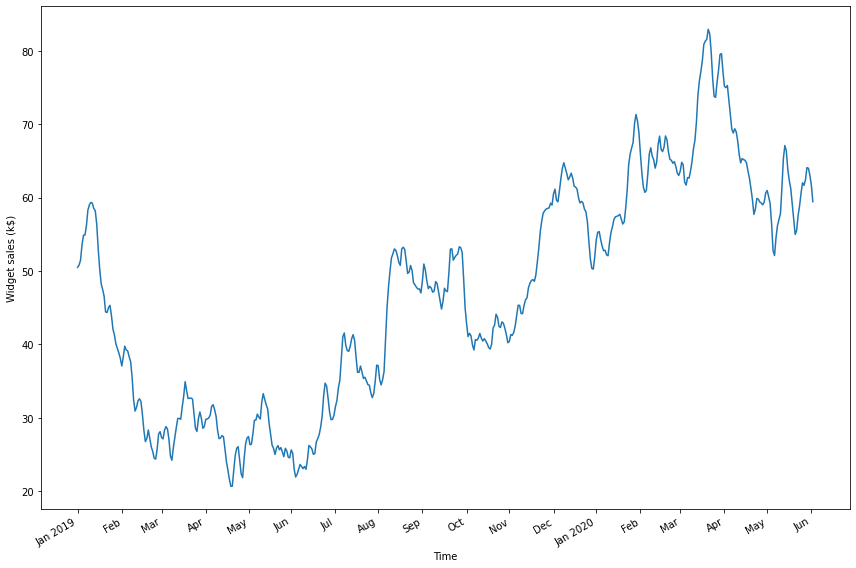

In [4]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df['widget_sales'])
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (k$)')

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498], 
    ['Jan 2019', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F01_peixeiro.png', dpi=300)

> In order to forecast the volume of widget sales, we need to identify the underlying
process. To do so, we will apply the same steps that we covered when
working with a random walk process.

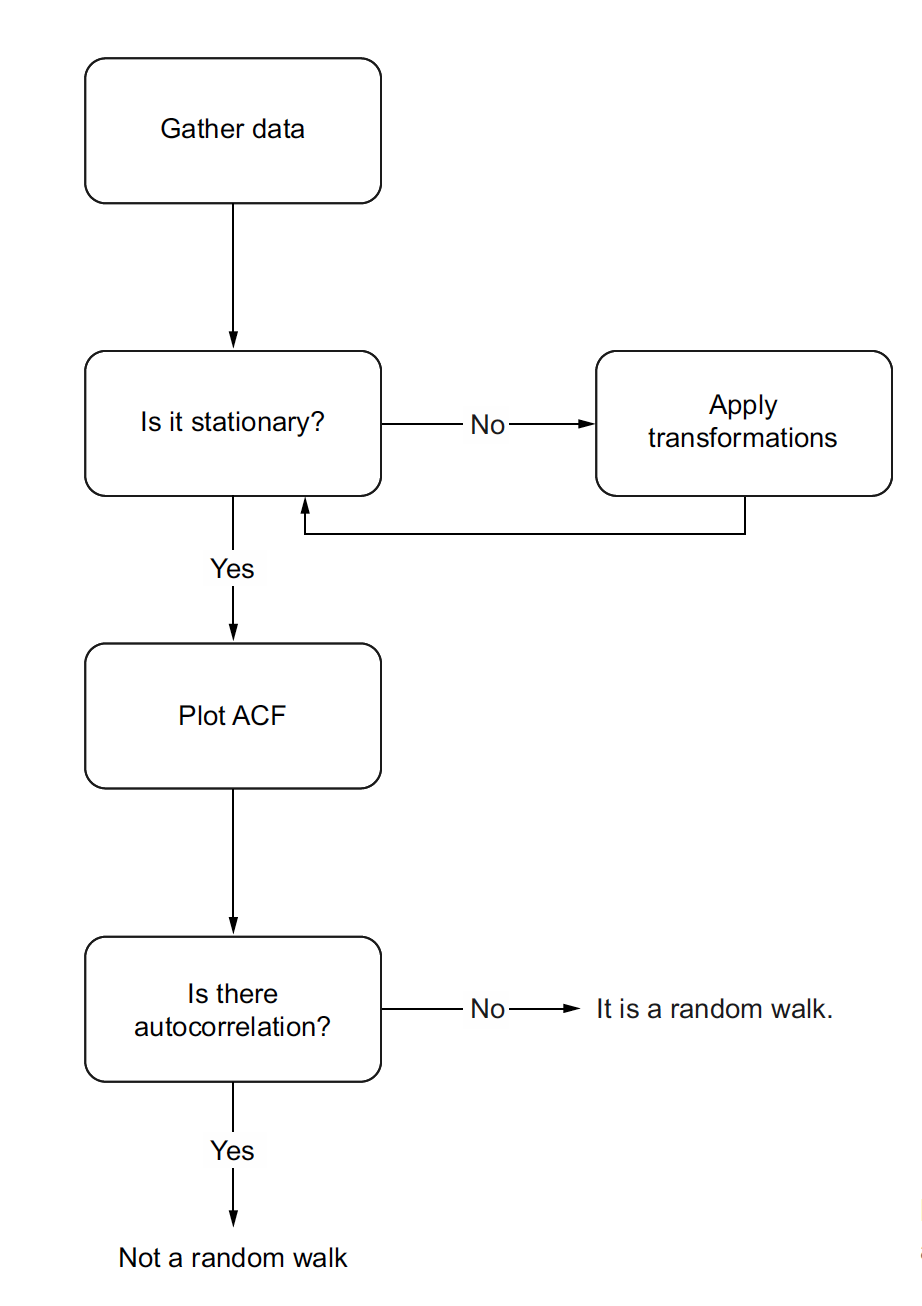

## Moving average process

* In a moving average $(MA)$ process, the current value depends linearly on the mean of the series, the current error term, and past error terms.
* The moving average model is denoted as $MA(q)$, where q is the order. The general expression of an $MA(q)$ model is


$$
\Large y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} +⋅⋅⋅+ \theta_q \epsilon_{t-q}
$$



### Moving average process $MA(q=1)$


* If $q=1$ The moving average model is denoted as $MA(1)$, The  expression of an $MA(1)$ model is


$$
\Large y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1}
$$

### Moving average process $MA(q=2)$
* If $q=1$ The moving average model is denoted as $MA(1)$, The  expression of an $MA(1)$ model is
$$
\Large y_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} 
$$

## Simulate a $MA(q)$ process


In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
np.random.seed(42)

ma2 = np.array([1, 0.9,0.3,0.5,0.4])
ar2 = np.array([1, 0])

MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)
ADF_result = adfuller(MA2_process)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')


ADF Statistic: -9.46999220957228
p-value: 4.1309148302378723e-16


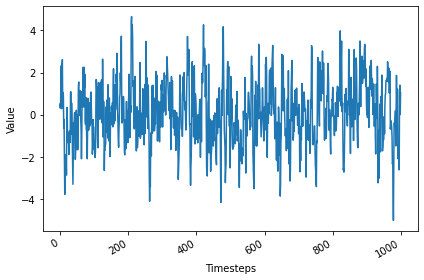

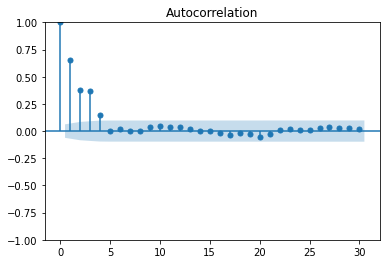

In [7]:
fig, ax = plt.subplots()

ax.plot(MA2_process)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

fig.autofmt_xdate()
plt.tight_layout()


# ACF function
plot_acf(MA2_process, lags=30);


## Identifying the order of a moving average process
* To identify the order of a moving average process, we can extend the steps needed to identify a random walk,

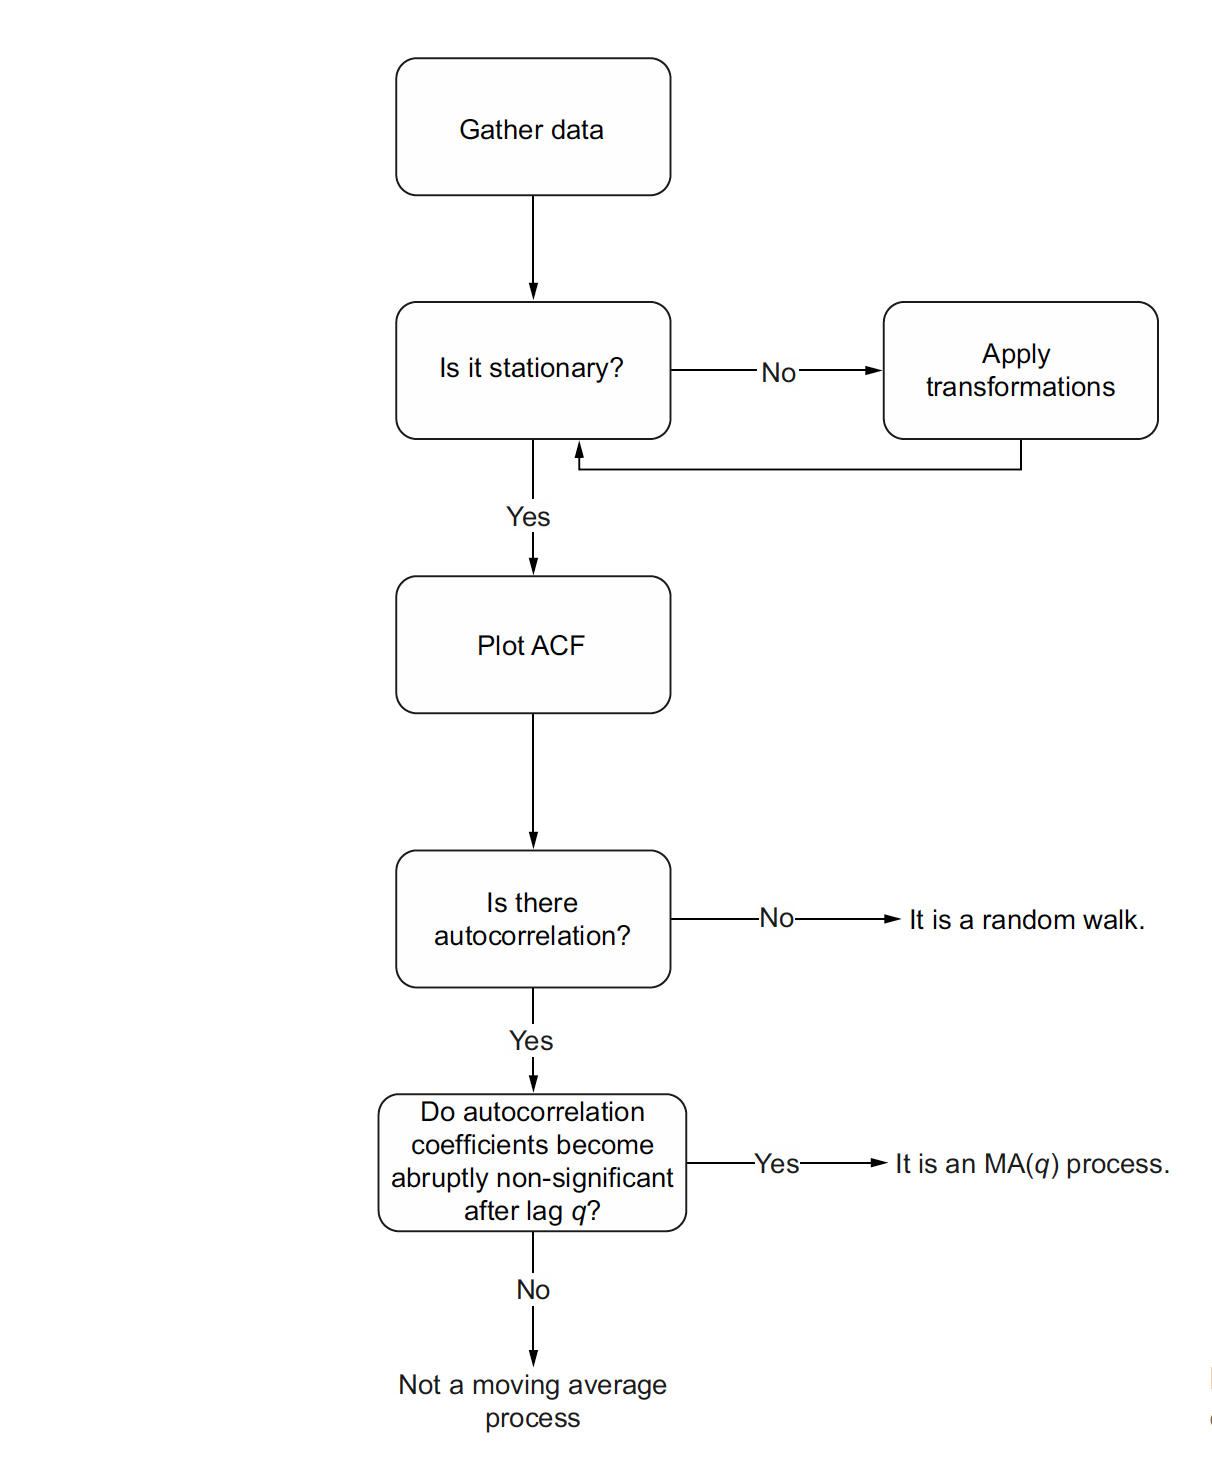

## Perform ADF test

In [35]:

# Import the required module to perform ADF test
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'widget_sales' column of the 'df' dataframe
ADF_result = adfuller(df['widget_sales'])

# Print the ADF statistic obtained from the ADF test
print(f'ADF Statistic: {ADF_result[0]}')

#Print the p-value obtained from the ADF test
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.5121662069359048
p-value: 0.5274845352272605


> This results in an ADF statistic of -1.51 and a p-value of 0.53. Here, the ADF statistic is not a large negative number, and the p-value is greater than 0.05. Therefore, our time series is not stationary, and we must apply transformations to make it stationary.


### Apply 1st difference transformation
In order to make our series stationary, we will try to stabilize the trend by applying
a first-order differencing. We can do so by using the diff method from the numpy
library. Remember that this method takes in a parameter n that specifies the order of
differencing. In this case, because it is a first-order differencing, $n$ will be equal to $1$.

In [36]:
widget_sales_diff = np.diff(df['widget_sales'], n=1) 

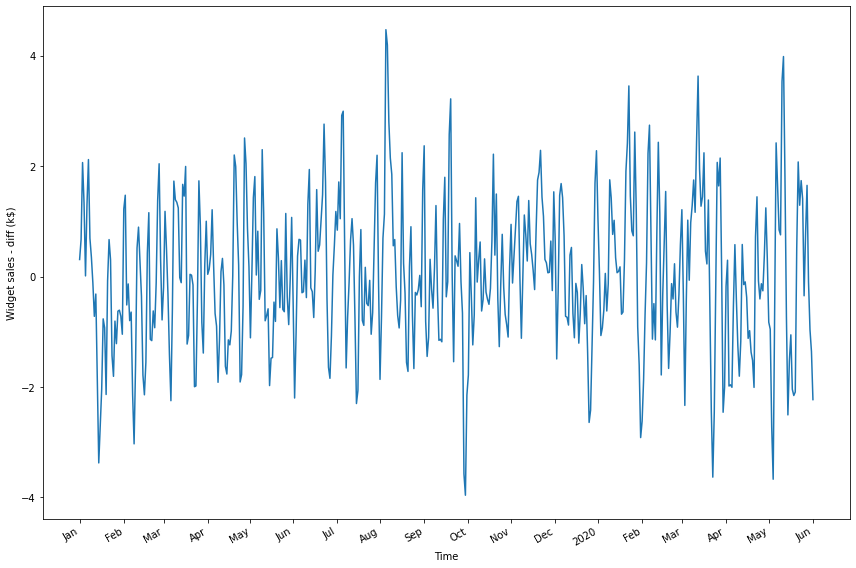

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot( )
ax.set_xlabel('Time')
ax.set_ylabel('Widget sales - diff (k$)')

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498], 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F05_peixeiro.png', dpi=300)

In [11]:
ADF_result = adfuller(widget_sales_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -10.576657780341959
p-value: 7.076922818587193e-19


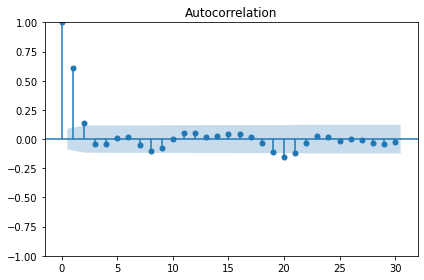

In [37]:
plot_acf(widget_sales_diff, lags=30);

plt.tight_layout()

plt.savefig('figures/CH04_F06_peixeiro.png', dpi=300)

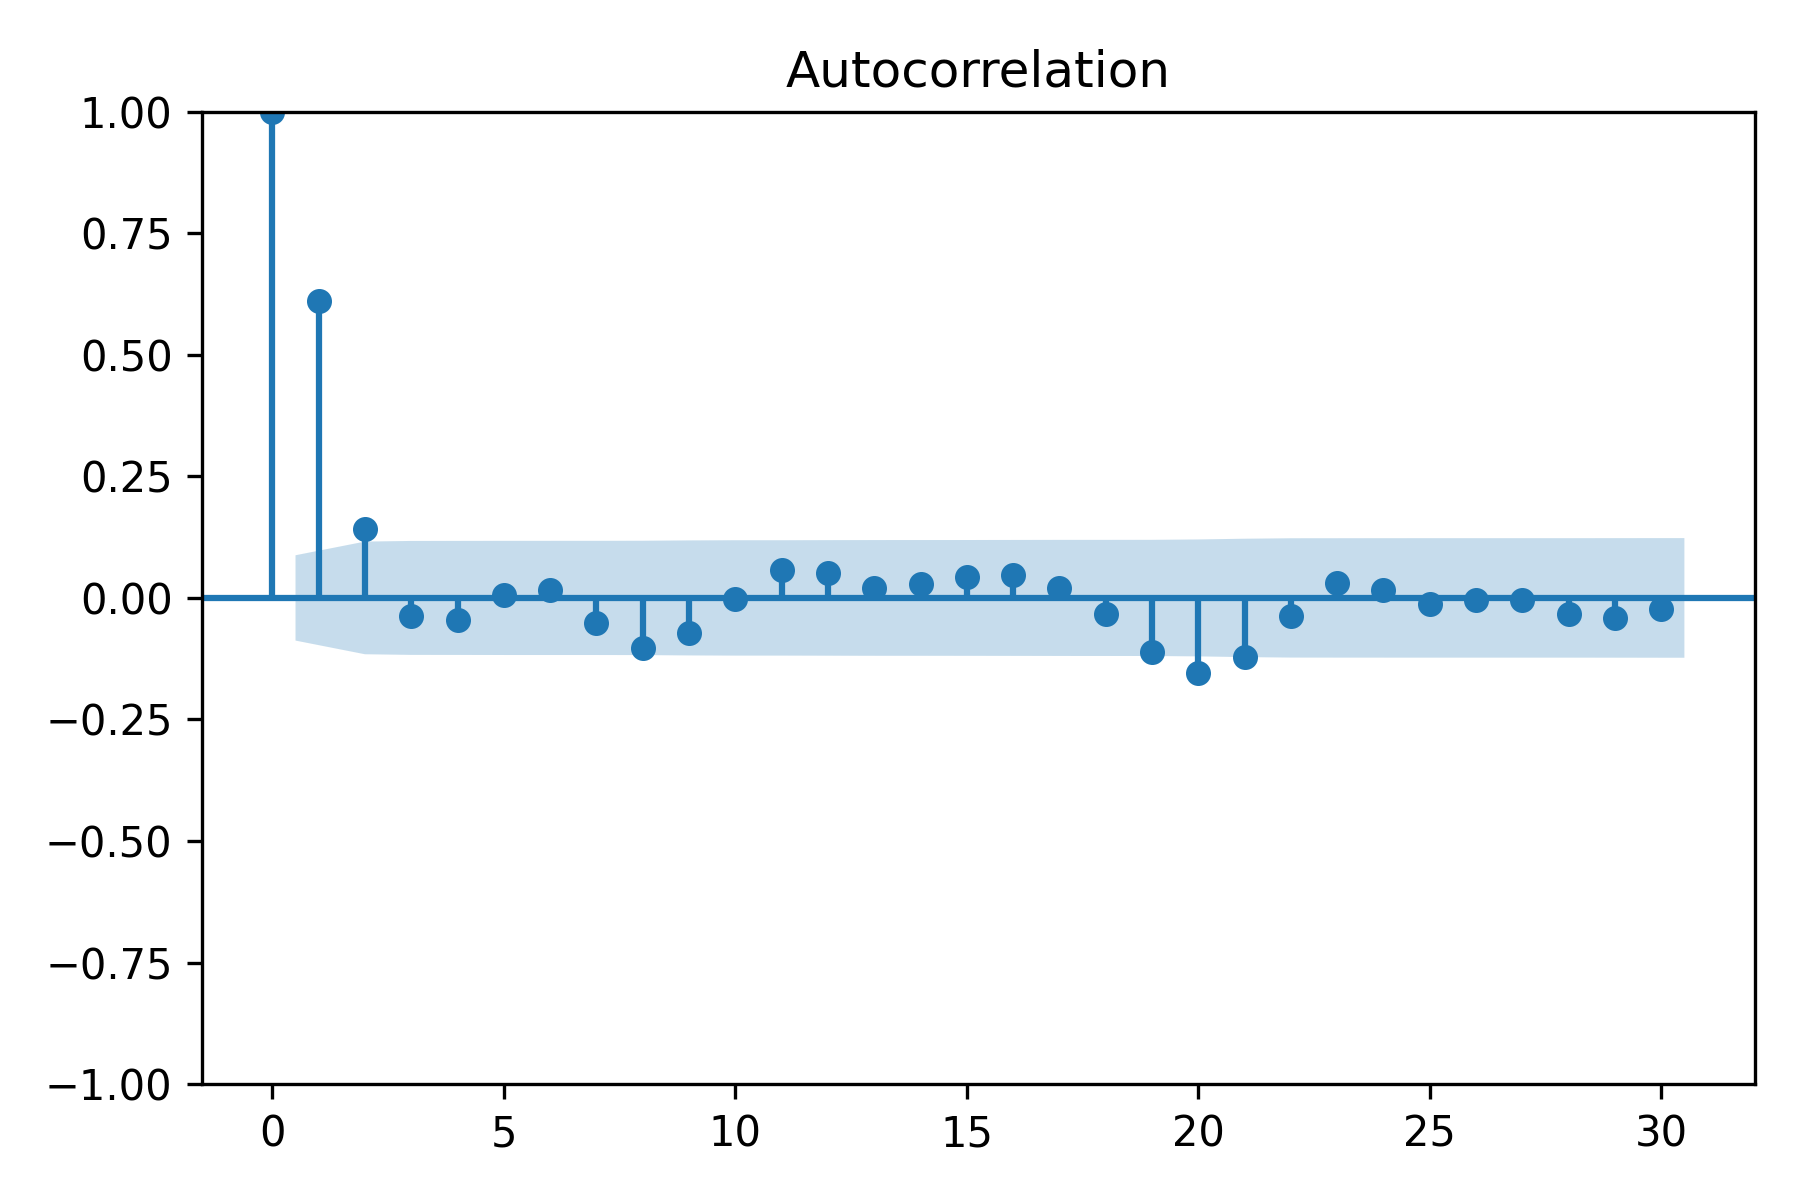

> $ACF$ plot of the differenced series. Notice how the coefficients are
significant up until lag $2$, and then they fall abruptly into the non-significance zone (shaded area) of the plot. There are some significant coefficients around lag $20$,but this is likely due to chance, since they are non-significant between lags $3$ and $20$ and after lag $20$.

## Forecasting a moving average process
* Once the order $q$ of the moving average process is identified, we can fit the model to our training data and start forecasting. 
* In our case, we discovered that the differenced volume of widget sales is a moving average process of order $2$, or an $MA(2)$ process.

* The moving average model assumes stationarity, meaning that our forecasts must be done on a stationary time series. 
* Therefore, we will train and test our model on the differenced volume of widget sales. 
* We will try two naive forecasting techniques and fit a second-order moving average model. The naive forecasts will serve as baselines to evaluate the performance of the moving average model, which we expect to be better than the baselines, since we previously identified our process to be a moving average process of order 2.

### Split data into training and testing

In [38]:
df_diff = pd.DataFrame({'widget_sales_diff': widget_sales_diff})

train = df_diff[:int(0.9*len(df_diff))]
test = df_diff[int(0.9*len(df_diff)):]

print(len(train))
print(len(test))

449
50


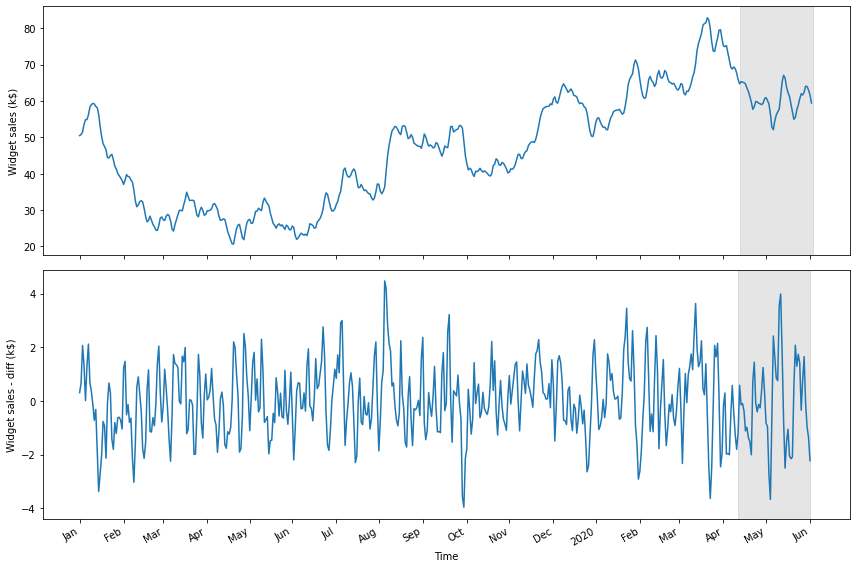

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,8))

ax1.plot(df['widget_sales'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Widget sales (k$)')
ax1.axvspan(450, 500, color='#808080', alpha=0.2)

ax2.plot(df_diff['widget_sales_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Widget sales - diff (k$)')
ax2.axvspan(449, 498, color='#808080', alpha=0.2)

plt.xticks(
    [0, 30, 57, 87, 116, 145, 175, 204, 234, 264, 293, 323, 352, 382, 409, 439, 468, 498], 
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', '2020', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F07_peixeiro.png', dpi=300)

### Applying $MA(2)$

In [43]:

model = SARIMAX(df_diff[:449], order=(0,0,2))
res = model.fit(disp=False) # Train the models

            
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:      widget_sales_diff   No. Observations:                  449
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -624.205
Date:                Mon, 27 Feb 2023   AIC                           1254.409
Time:                        14:42:21   BIC                           1266.730
Sample:                             0   HQIC                          1259.266
                                - 449                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8627      0.048     17.904      0.000       0.768       0.957
ma.L2          0.2532      0.049      5.139      0.000       0.157       0.350
sigma2         0.9425      0.060     15.835      0.0

In [47]:
predictions = res.get_prediction(0, 449 + 2)

predictions.predicted_mean

0      0.000000
1      0.184606
2      0.433434
3      1.498861
4      0.256523
         ...   
447   -0.666621
448   -0.724298
449   -1.078833
450   -0.273309
451    0.000000
Name: predicted_mean, Length: 452, dtype: float64

### Forecasting using the $MA(q)$ model
> When using an $MA(q)$ model, forecasting beyond $q$ steps into the future will simply
return the mean, because there are no error terms to estimate beyond q steps. We
can use rolling forecasts to predict up to $q$ steps at a time in order avoid predicting
only the mean of the series.

**NOTE** 
> * You do not have to forecast two steps ahead when you perform rolling forecasts with an $MA(2)$ model. You can forecast either one or two steps ahead repeatedly in order to avoid predicting only the mean. Similarly, with an $MA(3)$ model, you could perform rolling forecasts with one-, two-, or
three-step-ahead rolling forecasts. 
> * To create these forecasts, we need a function that will repeatedly fit a model and generate forecasts over a certain window of time, until forecasts for the entire test set are
obtained.

### Rolling forecasts

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'MA':
        pred_MA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(0,0,2))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)
            
        return pred_MA

In [49]:
pred_df = test.copy()

TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_MA = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'MA')

pred_df['pred_mean'] = pred_mean
pred_df['pred_last_value'] = pred_last_value
pred_df['pred_MA'] = pred_MA

pred_df.head()

,widget_sales_diff,pred_mean,pred_last_value,pred_MA
449,-1.170131,0.034319,-1.803658,-1.078833
450,0.580967,0.034319,-1.803658,-0.273309
451,-0.144902,0.032861,0.580967,0.781223
452,-0.096564,0.032861,0.580967,0.234969
453,-0.372334,0.032183,-0.096564,0.168994


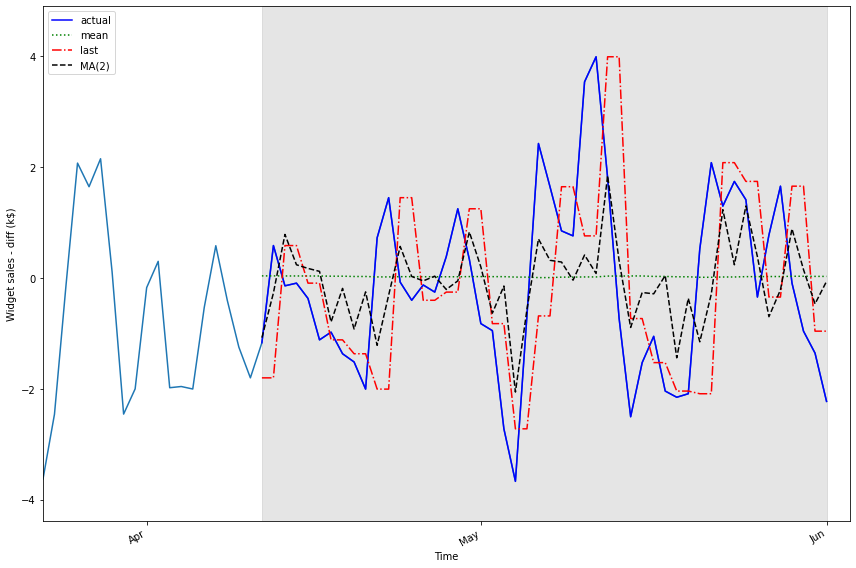

In [33]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df_diff['widget_sales_diff'])
ax.plot(pred_df['widget_sales_diff'], 'b-', label='actual')
ax.plot(pred_df['pred_mean'], 'g:', label='mean')
ax.plot(pred_df['pred_last_value'], 'r-.', label='last')
ax.plot(pred_df['pred_MA'], 'k--', label='MA(2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Widget sales - diff (k$)')

ax.axvspan(449, 498, color='#808080', alpha=0.2)

ax.set_xlim(430, 500)

plt.xticks(
    [439, 468, 498], 
    ['Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F08_peixeiro.png', dpi=300)

### Evaluation using $MSE$

In [50]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(pred_df['widget_sales_diff'], pred_df['pred_mean'])
mse_last = mean_squared_error(pred_df['widget_sales_diff'], pred_df['pred_last_value'])
mse_MA = mean_squared_error(pred_df['widget_sales_diff'], pred_df['pred_MA'])

print('%.3f' % mse_mean, '%.3f' % mse_last, '%.3f' % mse_MA)

2.561 3.249 1.948


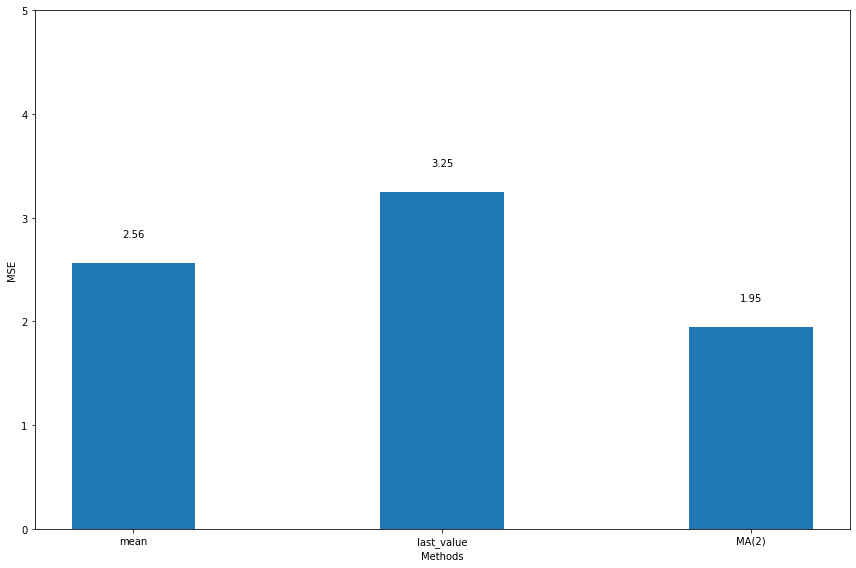

In [51]:
fig, ax = plt.subplots(figsize=(12,8))

x = ['mean', 'last_value', 'MA(2)']
y = [mse_mean, mse_last, mse_MA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 5)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.25, s=str(round(value, 2)), ha='center')

plt.tight_layout()

plt.savefig('figures/CH04_F09_peixeiro.png', dpi=300)

### Extend forecast to the actual data (Inverse the diff)

In [52]:
df['pred_widget_sales'] = pd.Series()
df['pred_widget_sales'][450:] = df['widget_sales'].iloc[450] + pred_df['pred_MA'].cumsum()

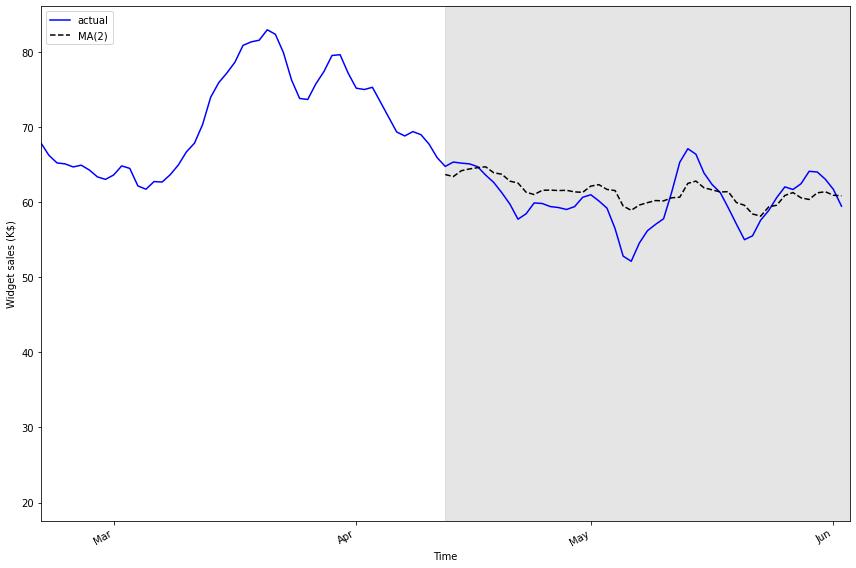

In [53]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df['widget_sales'], 'b-', label='actual')
ax.plot(df['pred_widget_sales'], 'k--', label='MA(2)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Widget sales (K$)')

ax.axvspan(450, 500, color='#808080', alpha=0.2)

ax.set_xlim(400, 500)

plt.xticks(
    [409, 439, 468, 498], 
    ['Mar', 'Apr', 'May', 'Jun'])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH04_F11_peixeiro.png', dpi=300)

### Evaluation

In [24]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae_MA_undiff = mean_absolute_error(df['widget_sales'].iloc[450:], df['pred_widget_sales'].iloc[450:])
mape_MA_undiff = mean_absolute_percentage_error(df['widget_sales'].iloc[450:], df['pred_widget_sales'].iloc[450:])

print('%.3f' % mae_MA_undiff)
print('%.3f' % mape_MA_undiff, '%')


2.324
0.039 %


## Summary
* A moving average process states that the present value is linearly dependent on the mean, present error term, and past error terms. The error terms are normally distributed.
* You can identify the order $q$ of a stationary moving average process by studying the $ACF$ plot. The coefficients are significant up until lag q only.
* You can predict up to $q$ steps into the future because the error terms are not observed in the data and must be recursively estimated.
* Predicting beyond $q$ steps into the future will simply return the mean of the series. To avoid that, you can apply rolling forecasts.
* If you apply a transformation to the data, you must undo it to bring your predictions back to the original scale of the data.
* The moving average model assumes the data is stationary. Therefore, you can only use this model on stationary data.